In [81]:
!pip install factor-analyzer

  Using cached factor_analyzer-0.5.1-py2.py3-none-any.whl



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
import sqlite3
import pandas as pd
import factor_analyzer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("Hello World")

Hello World


# 한글 폰트 설정

In [76]:
import platform

# 1. 운영체제(OS)에 따른 폰트 자동 설정
system_name = platform.system()

if system_name == 'Darwin':  # Mac (맥북)
    plt.rc('font', family='AppleGothic')
elif system_name == 'Windows':  # Windows (윈도우)
    plt.rc('font', family='Malgun Gothic')
else:  # Linux (코랩 등)
    # 리눅스는 폰트가 설치되어 있어야 함 (나눔고딕 등)
    plt.rc('font', family='NanumGothic')

# 2. 마이너스(-) 기호가 깨지는 현상 방지 (매우 중요!)
plt.rcParams['axes.unicode_minus'] = False

# 3. (선택) 고해상도 모니터에서 그래프 선명하게 보기 (Retina 설정)
%config InlineBackend.figure_format = 'retina'

print(f"{system_name} 환경에서 폰트 설정 완료!")

Windows 환경에서 폰트 설정 완료!


# 데이터 로드

In [4]:
conn = sqlite3.connect('baseball.db')

In [143]:
hitter_df = pd.read_sql_query("""
SELECT
    *
FROM
    player
RIGHT JOIN
    hitter
ON
    hitter.player_id = player.player_id
WHERE
    hitter.타석 >= 200
""", conn)

hitter_df.head()

,player_id,uniform_number,name,team,position,birth_day,height,weight,school,player_id,...,삼진,병살타,장타율,출루율,실책,도루성공률,멀티히트,출루율+장타율,득점권타율,대타타율
0,50150,33.0,손호영,롯데,내야수,1994-08-23,182,88,의왕부곡초-평촌중-충훈고-LG,50150,...,66,9,0.323,0.313,17,100.0,24,0.636,0.321,0.000
1,50167,2.0,이주형,키움,외야수,2001-04-02,181,80,송수초(해운대리틀)-센텀중-경남고-LG,50167,...,115,7,0.368,0.337,1,93.8,28,0.705,0.257,0.222
2,50208,6.0,오명진,두산,내야수,2001-09-04,179,79,대전신흥초-한밭중-세광고,50208,...,94,3,0.366,0.321,10,62.5,22,0.687,0.235,0.250
3,50357,57.0,박주홍,키움,외야수,2001-04-16,187,87,자양초(하남시리틀)-건대부중-장충고,50357,...,72,5,0.331,0.310,3,91.7,12,0.641,0.219,0.182
4,50458,58.0,김지찬,삼성,외야수,2001-03-08,163,64,백사초(이천시리틀)-모가중-라온고,50458,...,44,7,0.322,0.364,1,88.0,24,0.686,0.286,0.000


In [144]:
hitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_id       112 non-null    int64  
 1   uniform_number  110 non-null    float64
 2   name            112 non-null    object 
 3   team            112 non-null    object 
 4   position        112 non-null    object 
 5   birth_day       112 non-null    object 
 6   height          112 non-null    int64  
 7   weight          112 non-null    int64  
 8   school          112 non-null    object 
 9   player_id       112 non-null    int64  
 10  타율              112 non-null    float64
 11  경기              112 non-null    int64  
 12  타석              112 non-null    int64  
 13  타수              112 non-null    int64  
 14  득점              112 non-null    int64  
 15  안타              112 non-null    int64  
 16  2루타             112 non-null    int64  
 17  3루타             112 non-null    int

# 주성분 분석 가능 여부 확인

In [145]:
stat, p_value = factor_analyzer.calculate_bartlett_sphericity(hitter_data_df)
p_value

np.float64(2.386597190819239e-90)

- Bartlett's Sphericity Test의 pvalue가 0이다
- 주성분 분석 가능하다

# 주성분 분석 진행

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

In [147]:
hitter_data_df = hitter_df[["타율", "득점", "안타", "2루타", "3루타", "홈런", "타점", "도루", "도루실패",
                            "희생번트",  "희생플라이",  "볼넷",  "사구",  "삼진",  "병살타",  "장타율",
                            "출루율",  "실책",  "득점권타율",  "대타타율"
                           ]]

hitter_data_df_scaled = scaler.fit_transform(hitter_data_df)
hitter_data_df_scaled

array([[-5.10426221e-01, -5.02412117e-01, -3.74922519e-01, ...,
         1.82131404e+00,  8.89678603e-01, -1.05137602e+00],
       [-8.26444667e-01,  2.66437169e-01,  3.19378442e-01, ...,
        -8.78268058e-01, -1.98397873e-01,  5.92324517e-04],
       [-9.96022422e-02, -5.50465198e-01, -2.36062327e-01, ...,
         6.40246869e-01, -5.72424162e-01,  1.33273016e-01],
       ...,
       [-4.15620688e-01,  3.62543330e-01,  5.13782711e-01, ...,
         3.02799108e-01, -5.72424162e-01, -3.73756770e-01],
       [-3.84018843e-01, -3.58252876e-01, -1.52746211e-01, ...,
         3.02799108e-01,  3.11637975e-01,  1.33273016e-01],
       [-8.58046511e-01, -1.75179221e+00, -1.34694386e+00, ...,
        -5.40820297e-01, -1.55849347e+00, -1.05137602e+00]],
      shape=(112, 20))

In [148]:
num_components = min(hitter_data_df.shape)
pca = PCA(num_components)
PCA_result = pca.fit_transform(hitter_data_df_scaled)

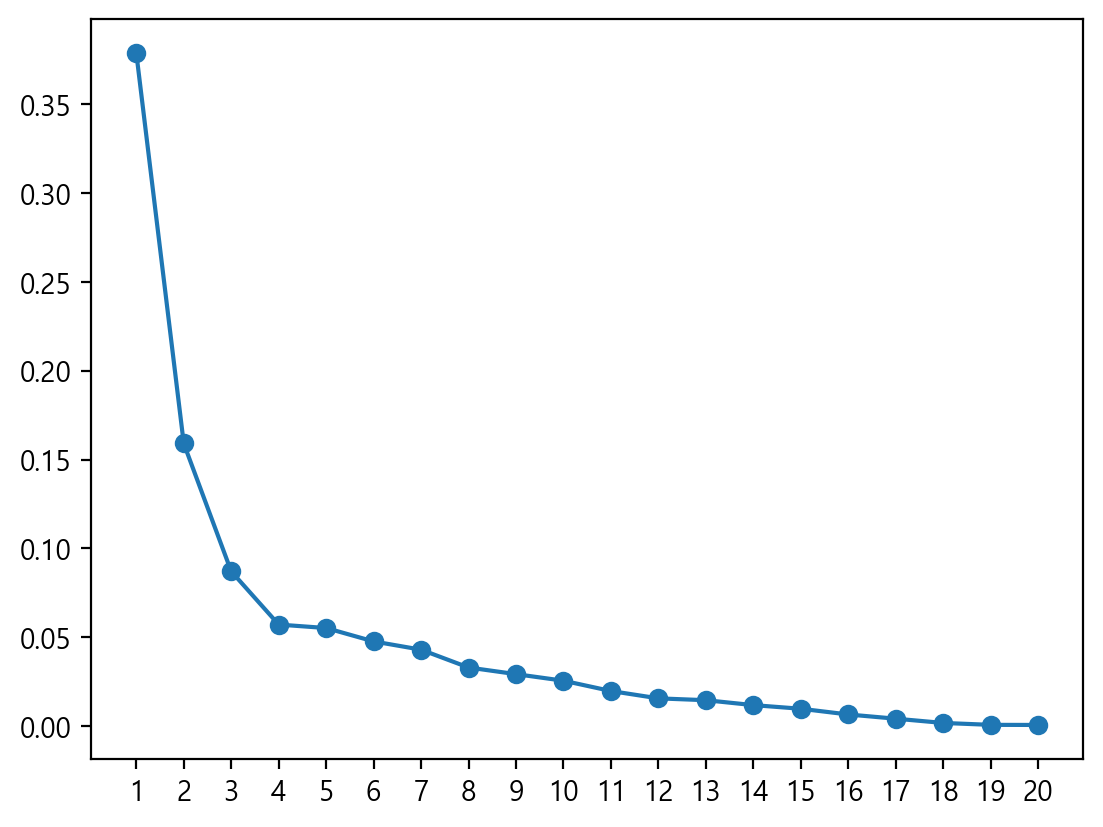

In [149]:
x = np.arange(1, num_components + 1)
y = pca.explained_variance_ratio_
plt.plot(x, y, marker="o")
plt.xticks(x)
plt.show()

In [150]:
corrlation_X_Z0 = []
for i in range(hitter_data_df_scaled.shape[1]):
    corrlation = float(np.corrcoef(PCA_result[:, 0], hitter_data_df_scaled[:, i])[0 ,1])
    corrlation_X_Z0.append(corrlation)


corrlation_X_Z1 = []
for i in range(hitter_data_df_scaled.shape[1]):
    corrlation = float(np.corrcoef(PCA_result[:, 1], hitter_data_df_scaled[:, i])[0 ,1])
    corrlation_X_Z1.append(corrlation)

corrlation_X_Z2 = []
for i in range(hitter_data_df_scaled.shape[1]):
    corrlation = float(np.corrcoef(PCA_result[:, 2], hitter_data_df_scaled[:, i])[0 ,1])
    corrlation_X_Z2.append(corrlation)

corrlation_X_Z3 = []
for i in range(hitter_data_df_scaled.shape[1]):
    corrlation = float(np.corrcoef(PCA_result[:, 3], hitter_data_df_scaled[:, i])[0 ,1])
    corrlation_X_Z3.append(corrlation)

correlation_X_Z0_Z1_Z2_Z3 = pd.DataFrame({
        "Z0_correlation" : corrlation_X_Z0,
        "Z1_correlation" : corrlation_X_Z1,
        "Z2_correlation" : corrlation_X_Z2,
        "Z3_correlation" : corrlation_X_Z3,
    },
    index = hitter_data_df.columns
)

correlation_X_Z0_Z1_Z2_Z3

,Z0_correlation,Z1_correlation,Z2_correlation,Z3_correlation
타율,0.704081,0.125151,-0.562200,-0.023666
득점,0.849362,0.336766,0.228451,-0.041961
안타,0.924729,0.163851,-0.040783,0.026979
2루타,0.858018,-0.053546,-0.063030,0.012641
3루타,0.253240,0.686374,0.018499,-0.392514
홈런,0.732688,-0.439179,0.365779,-0.080767
타점,0.929078,-0.228021,0.076918,-0.031023
도루,0.133722,0.865670,0.216370,-0.038482
도루실패,0.105659,0.852854,0.124206,-0.057620
희생번트,-0.239672,0.658537,-0.013463,0.418775


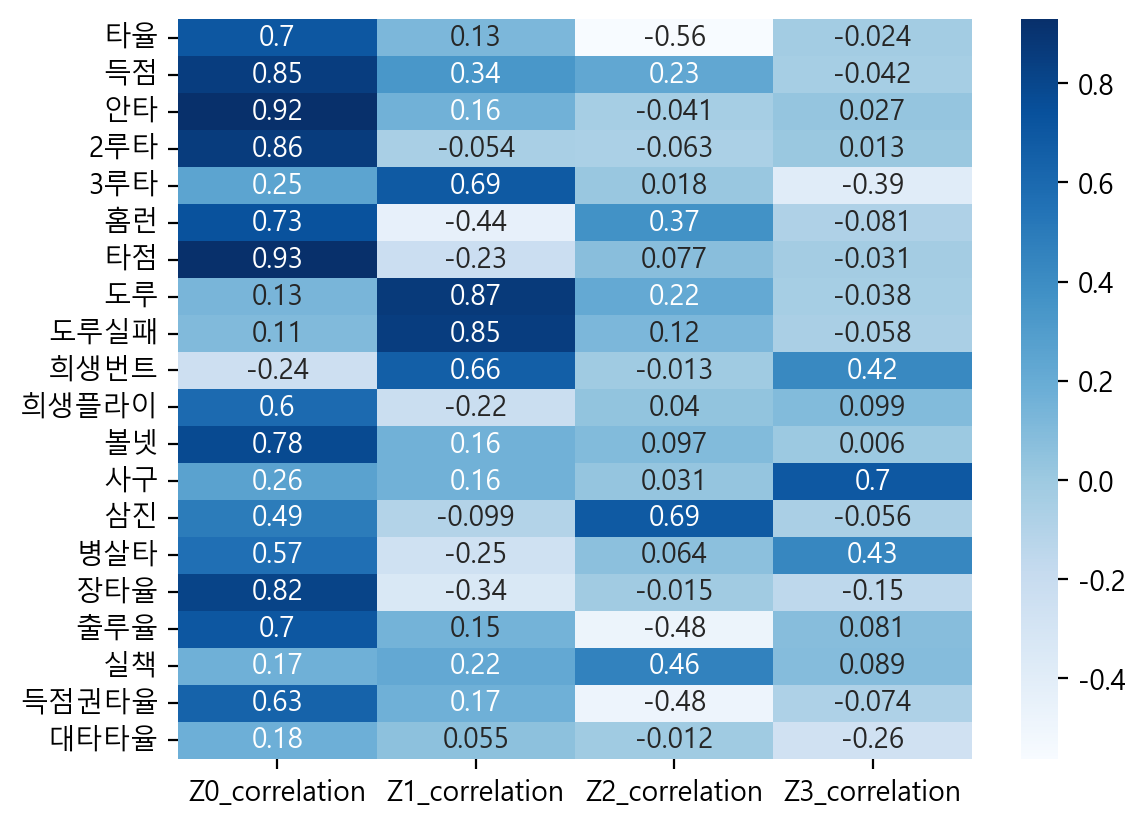

In [151]:
sns.heatmap(correlation_X_Z0_Z1_Z2_Z3, cmap="Blues", annot=True)
plt.show()

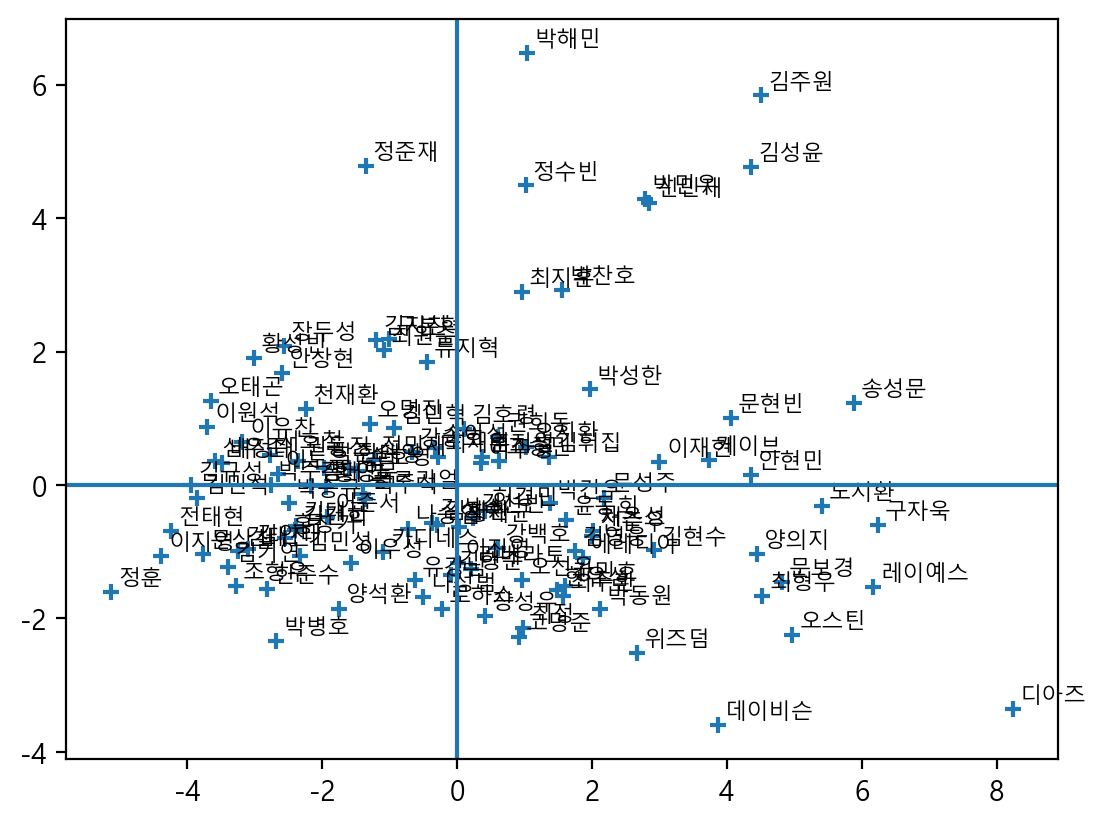

In [152]:
x = PCA_result[:, 0]
y = PCA_result[:, 1]

plt.scatter(x, y, marker="+")

for row in hitter_df.itertuples():
    plt.annotate(row.name, (x[row.Index] + 0.1, y[row.Index] + 0.1), size=8, zorder=1)


plt.axvline(0)
plt.axhline(0)

plt.show()

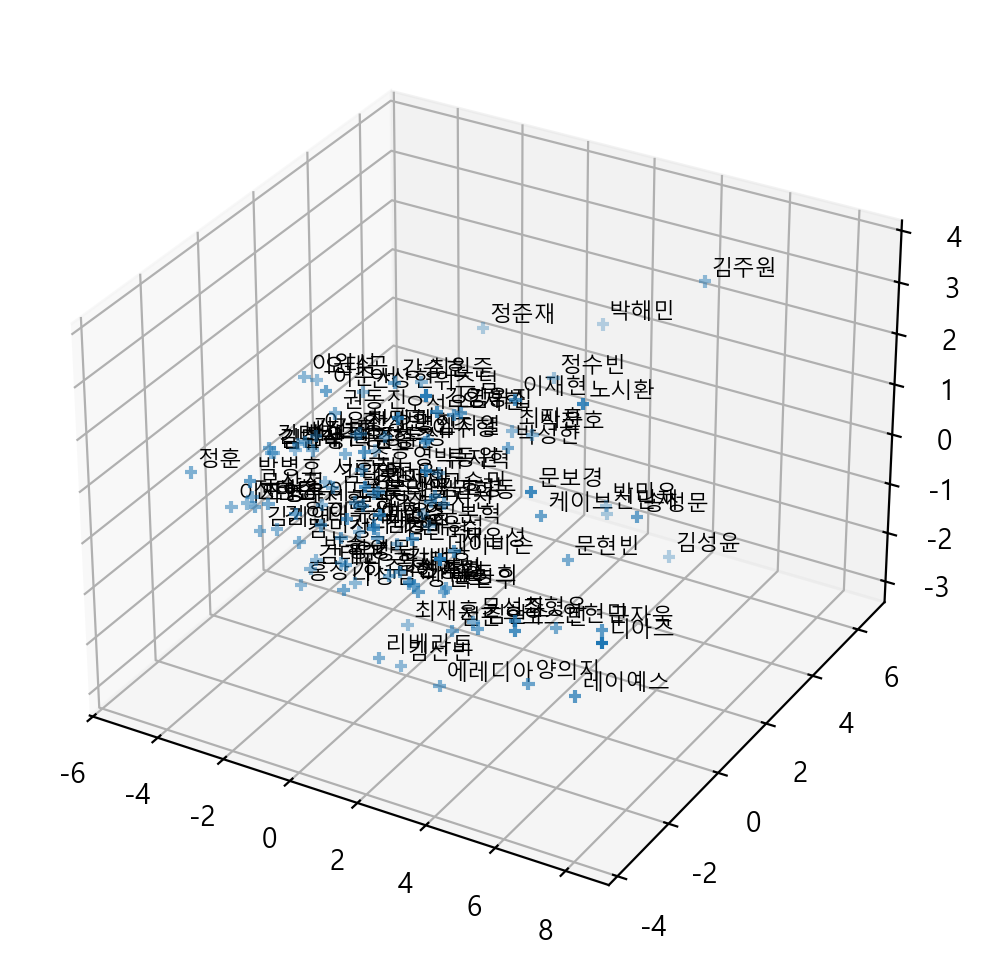

In [154]:
x = PCA_result[:, 0]
y = PCA_result[:, 1]
z = PCA_result[:, 2]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, marker="+")

for row in hitter_df.itertuples():
    ax.text(x[row.Index] + 0.1, y[row.Index] + 0.1, z[row.Index] + 0.1, row.name, size=8, zorder=1)

plt.show()

# 요인 분석 진행

In [ ]:
num_factors = min(hitter_data_df.shape) - 1